<a href="https://colab.research.google.com/github/mattsmiths/biol470/blob/main/week3/drosophilaTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Click to import libraries
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [ ]:
tempVid = '/content/drive/MyDrive/BIOL470/Activity_3/group_matt/group_matt_flyD_air_2025-02-05_20-15-26.avi'
in1 = cv.VideoCapture(tempVid)

In [ ]:
readIn,frame = in1.read()

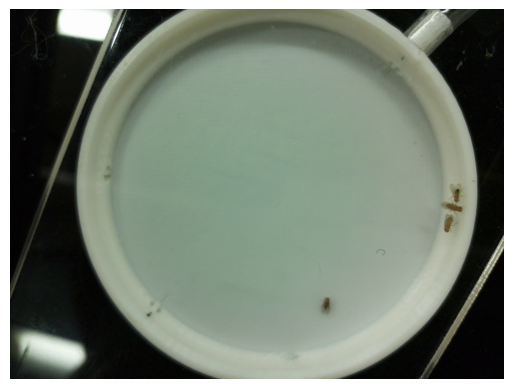

In [ ]:
plt.imshow(frame[:,:,::-1])
plt.axis('off')
plt.show()

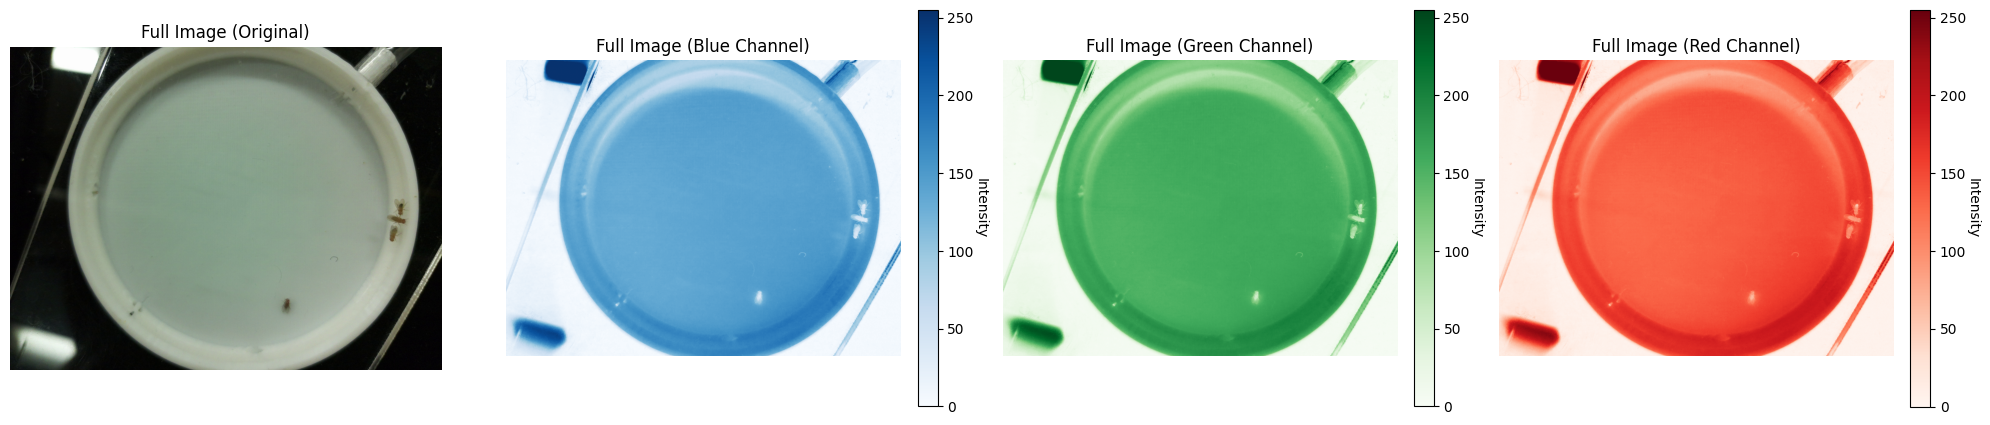

In [ ]:
#We'll start by reloading the first image we worked with:

# Convert the image to OpenCV format (NumPy array)
image = frame.copy()#cv.cvtColor(frame, cv.COLOR_RGB2BGR)  # Ensure OpenCV format

# Crop the upper-left 100x100 pixels
#cropped_image = image[300:700, 300:700,]


# Separate the color channels of the cropped image
#cropped_blue_channel = cropped_image[:, :, 0]  # Blue
#cropped_green_channel = cropped_image[:, :, 1]  # Green
#cropped_red_channel = cropped_image[:, :, 2]  # Red

# Separate the color channels of the full image
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Function to add a color bar
def plot_with_colorbar(ax, data, cmap, title):
    img = ax.imshow(data, cmap=cmap, vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis("off")
    cbar = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Intensity", rotation=270, labelpad=10)

# Plot the cropped image and its color channels
fig, axs = plt.subplots(1, 4, figsize=(20, 10))


# Full images
axs[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axs[0].set_title("Full Image (Original)")
axs[0].axis("off")

plot_with_colorbar(axs[1], blue_channel, "Blues", "Full Image (Blue Channel)")
plot_with_colorbar(axs[2], green_channel, "Greens", "Full Image (Green Channel)")
plot_with_colorbar(axs[3], red_channel, "Reds", "Full Image (Red Channel)")

plt.tight_layout()
plt.show()


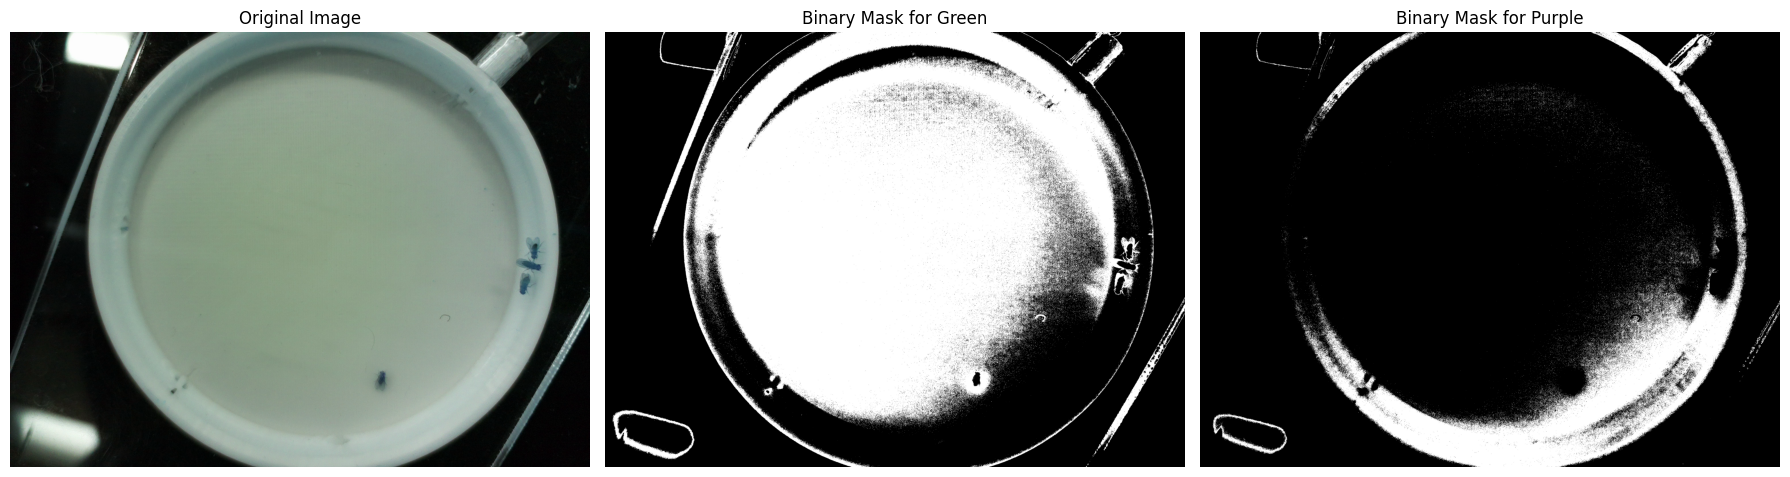

In [ ]:
# Create binary mask for green
red_mask = (image[:, :, 0] < 150) & (image[:, :, 1] > 100) & (image[:, :, 2] < 150)
red_mask = red_mask.astype(np.uint8) * 255  # Convert to binary format (0 or 255)

# Create binary mask for purple (Looks for high values in both red AND blue channels)
purple_mask = (image[:, :, 0] > 150) & (image[:, :, 1] < 200) & (image[:, :, 2] > 150)
purple_mask = purple_mask.astype(np.uint8) * 255  # Convert to binary format (0 or 255)

# Display the original image and binary masks
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Red mask
axs[1].imshow(red_mask, cmap="gray")
axs[1].set_title("Binary Mask for Green")
axs[1].axis("off")

# Purple mask
axs[2].imshow(purple_mask, cmap="gray")
axs[2].set_title("Binary Mask for Purple")
axs[2].axis("off")

plt.tight_layout()
plt.show()

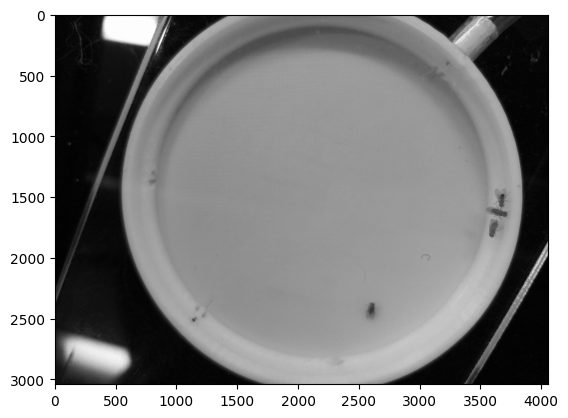

In [ ]:
tempIm = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(tempIm,cmap=plt.cm.gray)

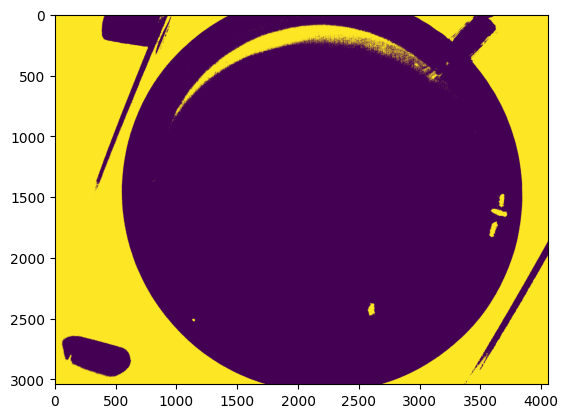

In [ ]:
# black and white thresholding
plt.imshow(tempIm<100)
binaryThreshold = (tempIm<100).astype(np.uint8)

(-0.5, 4055.5, 3039.5, -0.5)

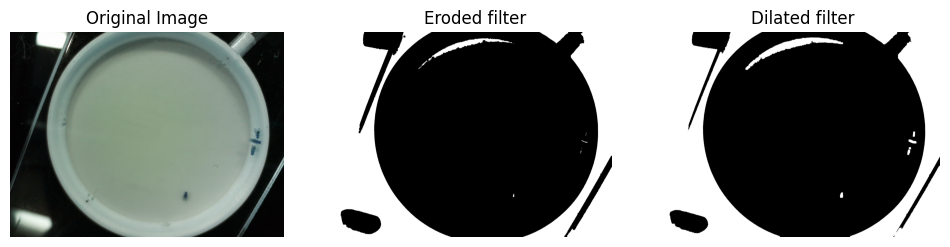

In [ ]:
# Define a kernel for morphological operations
kernel = np.ones((25, 25), np.uint8)  # 10x10 square kernel

# Apply erosion to remove small white noise
eroded_mask = cv.erode(binaryThreshold, kernel, iterations=1)

# Apply dilation to restore the shape of larger regions
dilated_mask = cv.dilate(eroded_mask, kernel, iterations=1)

# Display the original mask and cleaned-up versions in a 2x2 layout
fig, axs = plt.subplots(1, 3, figsize=(12, 12))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Original purple mask
axs[1].imshow(eroded_mask, cmap="gray")
axs[1].set_title("Eroded filter")
axs[1].axis("off")

# Original purple mask
axs[2].imshow(dilated_mask, cmap="gray")
axs[2].set_title("Dilated filter")
axs[2].axis("off")

In [ ]:
frame = image.copy()
# Find contours in the binary mask
contours, _ = cv.findContours(dilated_mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Loop through each detected contour
for contour in contours:
    # Skip small contours (less than the specified area threshold)
    if cv.contourArea(contour) > 7000 or cv.contourArea(contour) < 1500:
        continue
    x, y, w, h = cv.boundingRect(contour)

    # Draw a rectangle around the detected green object
    cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 6)

# Display the original frame with bounding boxes
cv.imwrite('/content/flyTracker.jpg', frame)

True

In [ ]:
np.shape(frame)

(3040, 4056, 3)

In [ ]:
kernel = np.ones((25, 25), np.uint8)  # 10x10 square kernel

vid1 = cv.VideoWriter('/content/flyTracker.avi',cv.VideoWriter_fourcc('M','J','P','G'),10,(4056,3040))
flyOut = {}


for ff in range(0,5):
  flyOut['fly'+str(ff)+'x'] = np.zeros(101)
  flyOut['fly'+str(ff)+'y'] = np.zeros(101)


for elee in range(0,100):

  readIn,image = in1.read()
  tempIm = cv.cvtColor(image,cv.COLOR_BGR2GRAY) < 100
  binaryThreshold = (tempIm).astype(np.uint8)

  # Apply erosion to remove small white noise
  eroded_mask = cv.erode(binaryThreshold, kernel, iterations=1)

  # Apply dilation to restore the shape of larger regions
  dilated_mask = cv.dilate(eroded_mask, kernel, iterations=1)


  contours, _ = cv.findContours(dilated_mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  flycnt = 0
  # Loop through each detected contour
  for contour in contours:
      # Skip small contours (less than the specified area threshold)
      if cv.contourArea(contour) > 7000 or cv.contourArea(contour) < 1500:
          continue
      x, y, w, h = cv.boundingRect(contour)

      xx = []
      yy= []
      for ele in np.squeeze(contour):
        xx.append(ele[0])
        yy.append(ele[1])
      xx = np.nanmean(xx)
      yy = np.nanmean(yy)

      tN = 'fly'+str(flycnt)

      #if tN+'x' not in flyOut:
      #  flyOut[tN+'x'] = []
      #  flyOut[tN+'y'] = []

      flyOut[tN+'x'][elee] = xx#.append(xx)
      flyOut[tN+'y'][elee] = yy#.append(yy)


      flycnt+=1
      # Draw a rectangle around the detected green object
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 6)



  flycnt=0
  # Display the original frame with bounding boxes
  vid1.write(image)
vid1.release()

In [ ]:
flyOut.keys()

dict_keys(['fly0x', 'fly0y', 'fly1x', 'fly1y', 'fly2x', 'fly2y', 'fly3x', 'fly3y', 'fly4x', 'fly4y'])

In [ ]:
import pandas as pd

In [ ]:
for ele in flyOut.keys():
  print(len(flyOut[ele]))
len(flyOut['fly1y'])

101
101
101
101
101
101
101
101
101
101


101

In [ ]:
csvOut = pd.DataFrame.from_dict(flyOut)
csvOut.to_csv('/content/flyTracker.csv')

In [ ]:
csvOut

,fly0x,fly0y,fly1x,fly1y,fly2x,fly2y,fly3x,fly3y,fly4x,fly4y
0,1852.370370,2669.962963,1752.800000,2556.466667,2592.216216,2430.621622,3483.449275,1735.115942,0.0,0.0
1,1742.746269,2503.656716,2590.939394,2431.969697,3480.750000,1732.970588,1148.529412,604.000000,0.0,0.0
2,1814.909091,2635.272727,1723.661017,2479.983051,2587.407407,2432.333333,3481.606061,1736.515152,0.0,0.0
3,1805.888889,2615.555556,1717.619718,2446.478873,2586.413793,2431.931034,3478.524590,1735.196721,0.0,0.0
4,1788.222222,2596.370370,2588.416667,2427.805556,1706.421053,2412.421053,3478.739726,1735.753425,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
96,2571.730159,2441.936508,3487.764706,1736.294118,2011.970149,348.343284,2145.738739,270.270270,0.0,0.0
97,2571.460000,2443.340000,3490.015625,1735.656250,2004.347826,347.173913,2142.990654,276.373832,0.0,0.0
98,2567.136364,2447.196970,3488.121212,1736.712121,2006.028986,348.594203,2142.448980,276.234694,0.0,0.0
99,2565.583333,2444.433333,3481.232877,1734.273973,1998.718750,346.656250,2145.009346,269.121495,0.0,0.0
